# [Intermediate `seaborn`](https://www.datacamp.com/completed/statement-of-accomplishment/course/e5684bcaf4cfb40aef8fb51abed3e3e1fdac6dbe)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/intermediate_seaborn/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/intermediate_seaborn/notebook.ipynb)

**Contents**
* [Introduction](#Introduction)
* [Customizing Plots](#Customizing-Plots)
* [Additional Plot Types](#Additional-Plot-Types)
* [Data-Aware Grids](#Data-Aware-Grids)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Washington DC Bike Share
bike_share = pd.read_csv('bike_share.csv')

# 2018 US Dept of Education College Scorecard
college_scorecard = pd.read_csv('college_scorecard.csv')

# Daily Show guests from 1999-2015
daily_show_guests = pd.read_csv('daily_show_guests.csv')

# 2018 US Housing and Urban Development Fair Market Rent
fair_market_rent = pd.read_csv('fair_market_rent.csv')

# 2010 US School Improvement Grants
school_grants = pd.read_csv('school_grants.csv')

# FiveThirtyEight's "Dear Mona, Which State Has The Worst Drivers?"
worst_drivers = pd.read_csv('worst_drivers.csv')


## Introduction

Seaborn plot functions can be _figure-level_ or _axes-level_. Figure-level function create a new figure and set-up a `FacetGrid` allowing you to plot multiple subplots. Axes-level functions draw onto a specific axes and are lower-level.

### Distribution Plots

_Distribution plots_ are used to visualize univariate distributions of observations, that is, observations of a single variable. Seaborn's `displot()` method is figure-level function that renders a histogram by default. `histplot()`, `kdeplot()`, and `rugplot()` are axes-level functions.

In [2]:
df = school_grants.copy()


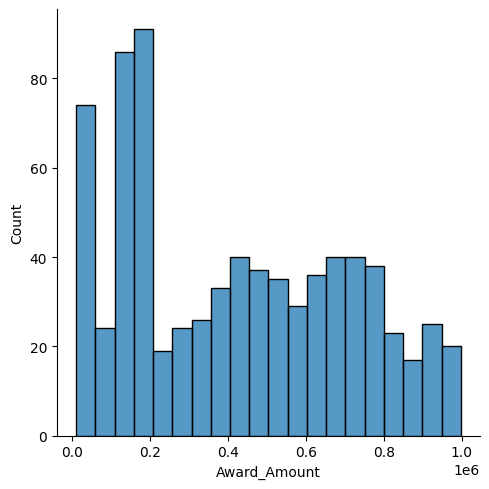

In [3]:
# plot a histogram of the award amount
sns.displot(df["Award_Amount"], bins=20)
plt.show()


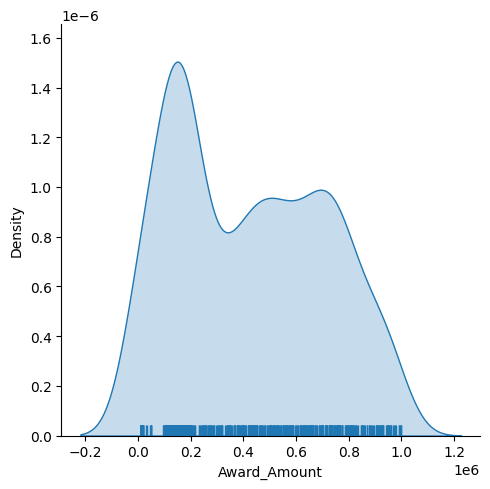

In [4]:
# plot a shaded KDE and rug plot of the award amount
sns.displot(df["Award_Amount"], kind="kde", fill=True, rug=True)
plt.show()


### Regression Plots

_Regression plots_ are used to visualize the relationship between two variables. Seaborn's `lmplot()` is a figure-level function for plotting data and a linear regression model fit line. `regplot()` is an axes-level function.

It's important to note that `lmplot()` has a `hue` keyword argument; `regplot()` does not.

In [5]:
df = worst_drivers.copy()


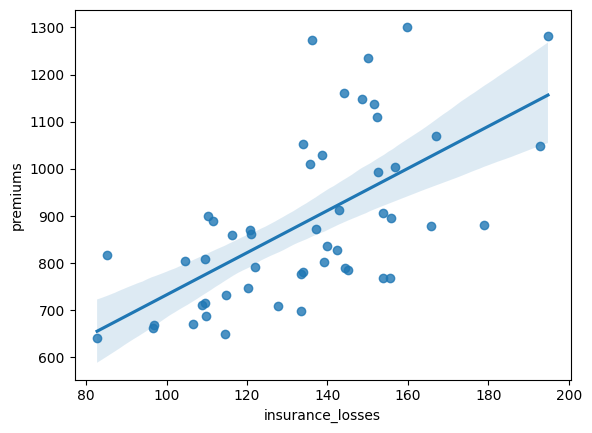

In [6]:
# regression plot insurance losses vs premiums
sns.regplot(data=df, x="insurance_losses", y="premiums")
plt.show()


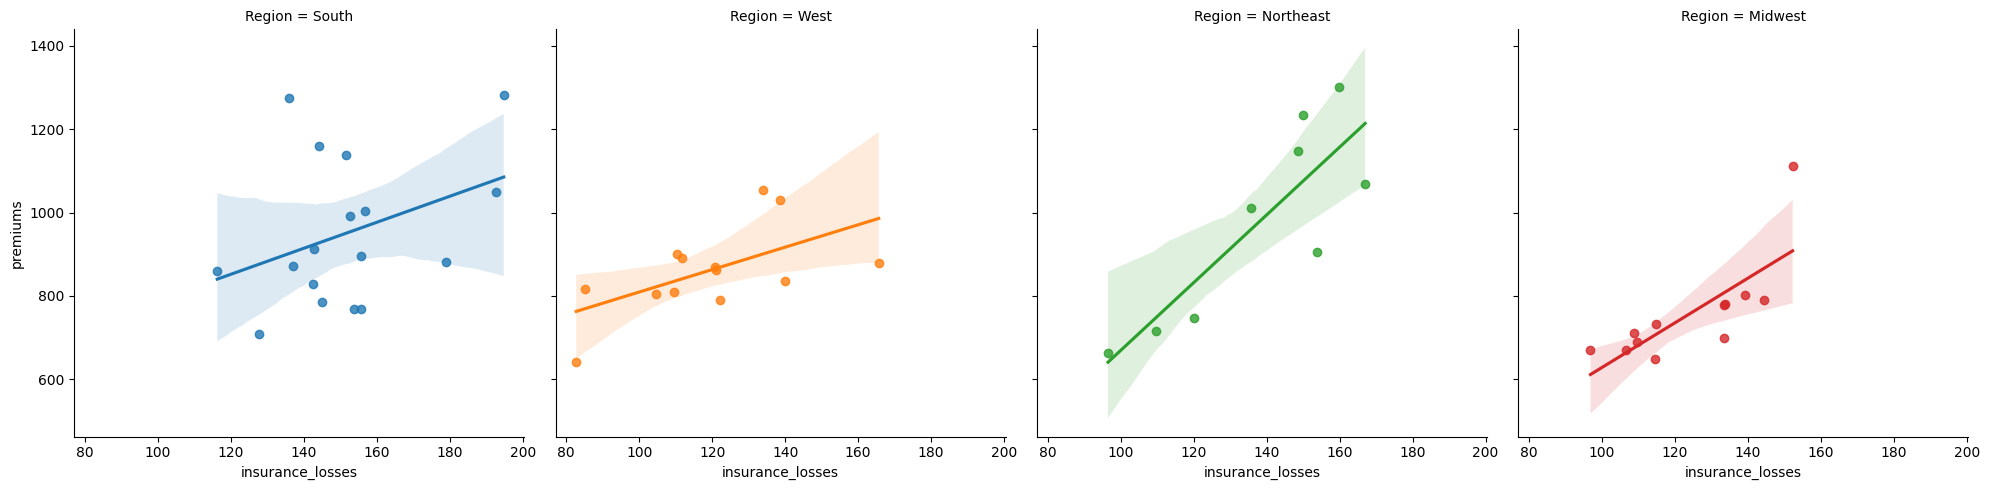

In [7]:
# linear model plot
sns.lmplot(data=df, x="insurance_losses", y="premiums", hue="Region", col="Region")
plt.show()


In [8]:
df = college_scorecard.copy()


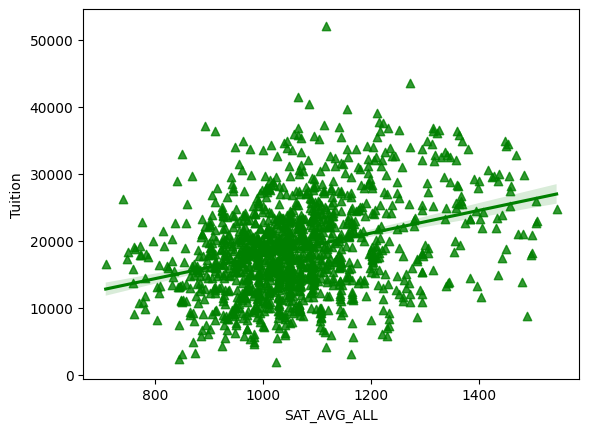

In [9]:
# regression plot average SAT vs tuition using green triangles
sns.regplot(data=df, x="SAT_AVG_ALL", y="Tuition", marker="^", color="g")
plt.show()


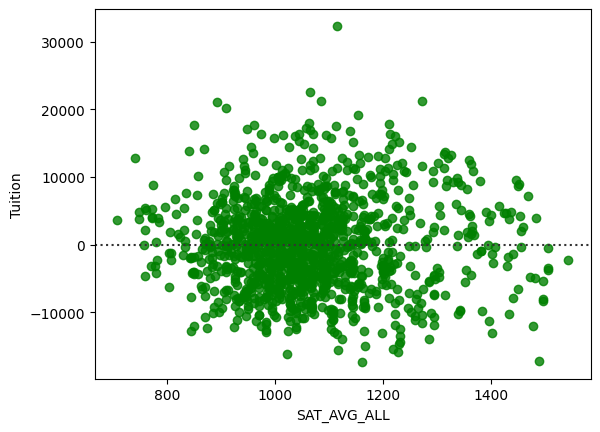

In [10]:
# residual plot
sns.residplot(data=df, x="SAT_AVG_ALL", y="Tuition", color="g")
plt.show()


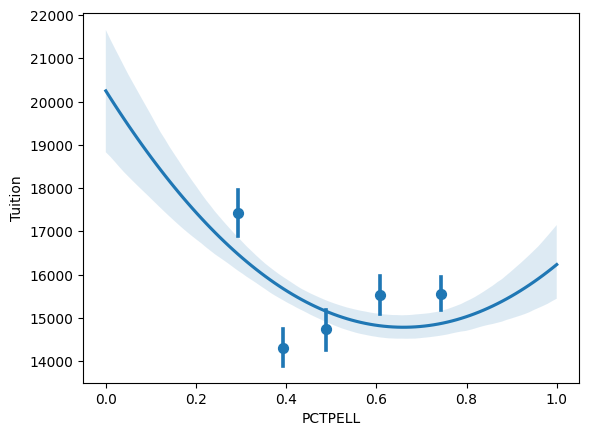

In [11]:
# regression plot Pell grant rate vs tuition
# combine into 5 bins with a 2nd order polynomial fit line
sns.regplot(data=df, x="PCTPELL", y="Tuition", x_bins=5, order=2)
plt.show()


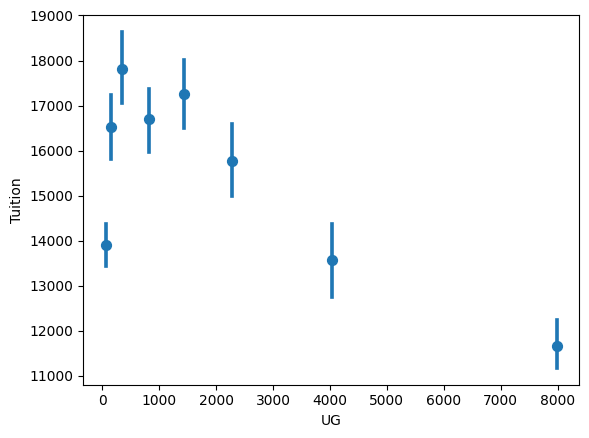

In [12]:
# regression plot undergrad population vs tuition
# combine into 8 bins with no fit line
sns.regplot(data=df, x="UG", y="Tuition", x_bins=8, fit_reg=False)
plt.show()


## Customizing Plots

In [13]:
df = fair_market_rent.copy()


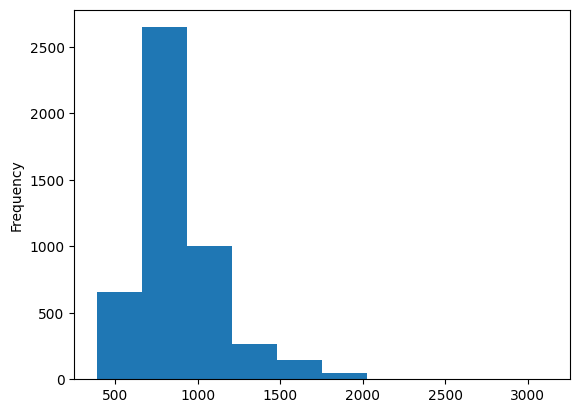

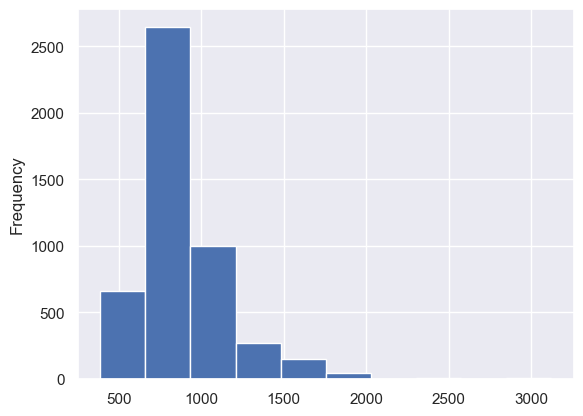

In [14]:
# use matplotlib's defaults
plt.rcdefaults()

# plot a histogram and clear the figure
df["fmr_2"].plot.hist()
plt.show()
plt.clf()

# set the default seaborn style
sns.set()

# histogram of `fmr_2`
df["fmr_2"].plot.hist()
plt.show()


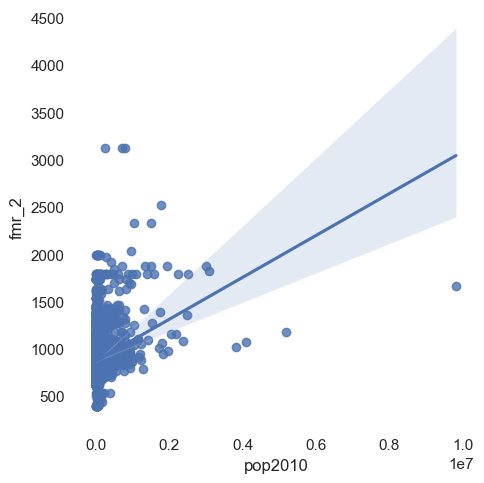

In [15]:
# set style to white
sns.set_style("white")

# regression plot of pop2010 vs fmr_2
sns.lmplot(data=df, x="pop2010", y="fmr_2")

# remove the spines
sns.despine(left=True, bottom=True)
plt.show()


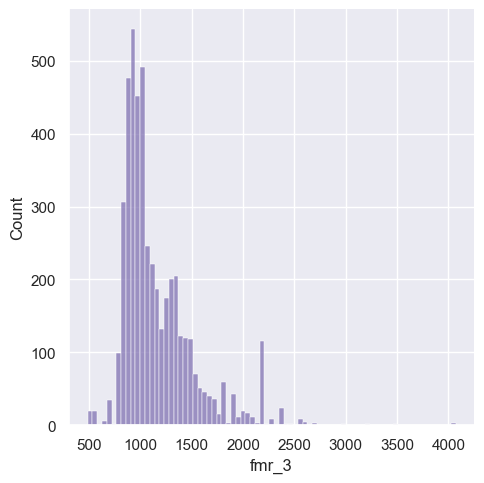

In [16]:
# use matplotlib color codes
sns.set(color_codes=True)
sns.displot(df["fmr_3"], color="m")
plt.show()


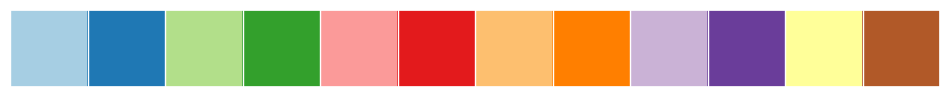

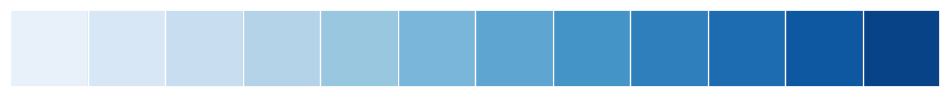

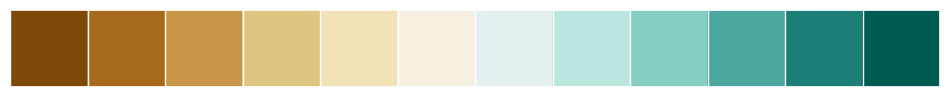

In [17]:
# circular colors for unordered data
sns.palplot(sns.color_palette("Paired", 12))
plt.show()

# sequential colors for a range of data
sns.palplot(sns.color_palette("Blues", 12))
plt.show()

# diverging colors for low and high values
sns.palplot(sns.color_palette("BrBG", 12))
plt.show()


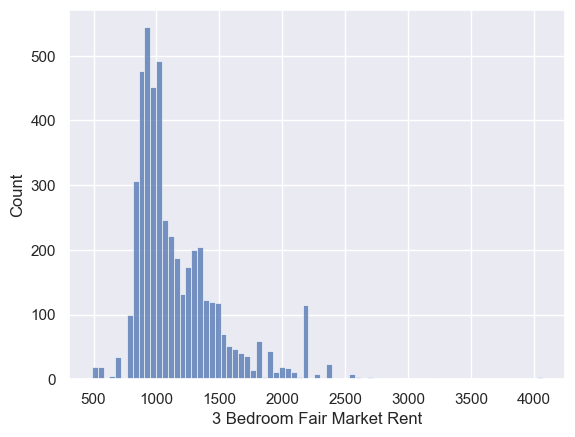

In [18]:
fig, ax = plt.subplots()

# plot histogram
sns.histplot(df["fmr_3"], ax=ax)

# relabel
ax.set(xlabel="3 Bedroom Fair Market Rent")
plt.show()


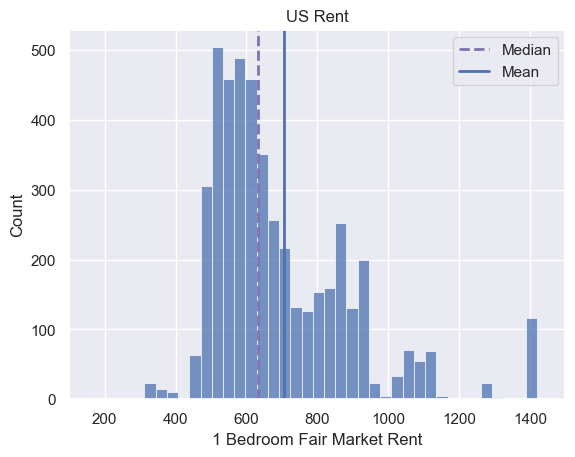

In [19]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.histplot(df["fmr_1"], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100, 1500), title="US Rent")

# add vertical lines for median and mean
ax.axvline(x=df["fmr_1"].median(), c="m", label="Median", linestyle="--", linewidth=2)
ax.axvline(x=df["fmr_1"].mean(), c="b", label="Mean", linestyle="-", linewidth=2)

# show the legend
ax.legend()
plt.show()


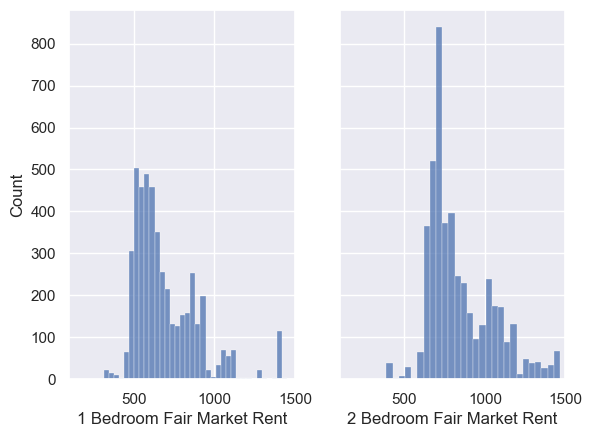

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# plot distribution of 1 bedroom apartments on ax0
sns.histplot(df["fmr_1"], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100, 1500))

# plot distribution of 2 bedroom apartments on ax1
sns.histplot(df["fmr_2"], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100, 1500))
plt.show()


## Additional Plot Types

### Categorical Scatter Plots

Seaborn's `stripplot()` and `swarmplot()` are axes-level functions for plotting _categorical scatter plots_. You can use `kind="strip"` (default) or `kind="swarm"` with the figure-level `catplot()` function.

In [21]:
df = school_grants.copy()


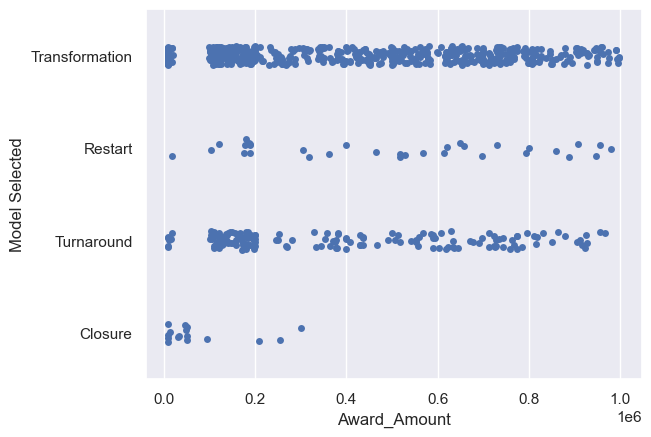

In [22]:
# strip plot award amount vs model selected
sns.stripplot(data=df, x="Award_Amount", y="Model Selected", jitter=True)
plt.show()


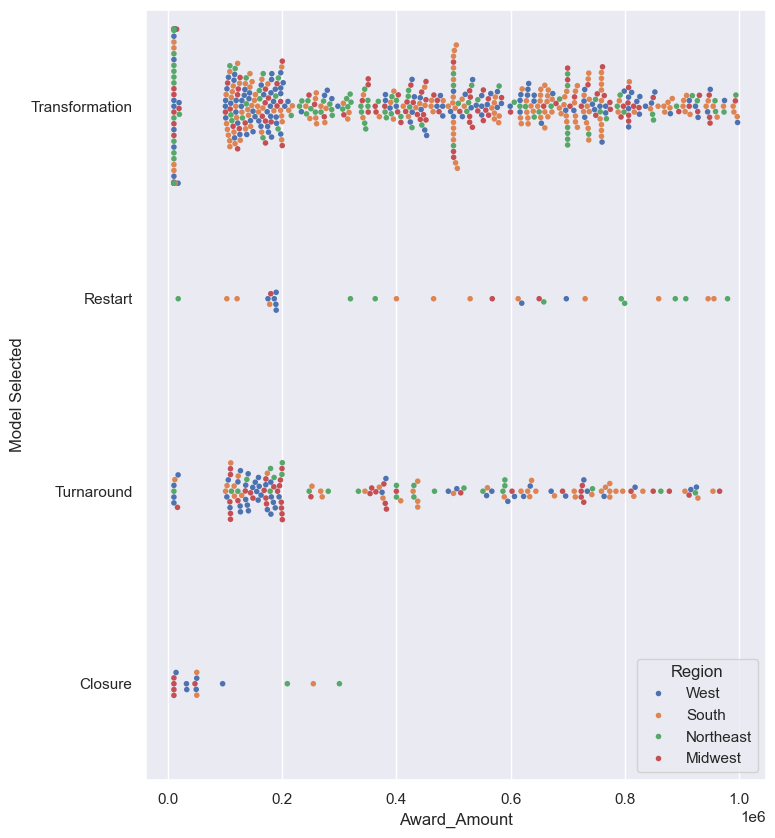

In [23]:
# resize so markers fit
plt.figure(figsize=(8, 10))

# swarm plot award amount vs model selected colored by region
# make markers smaller
sns.swarmplot(data=df, x="Award_Amount", y="Model Selected", hue="Region", size=4)

plt.show()


### Categorical Distribution Plots

The `boxplot()` (`kind="box"`), `violinplot()` (`kind="violin"`), and `boxenplot()` (`kind="boxen"`) axes-level functions are used to plot _categorical distribution plots_.

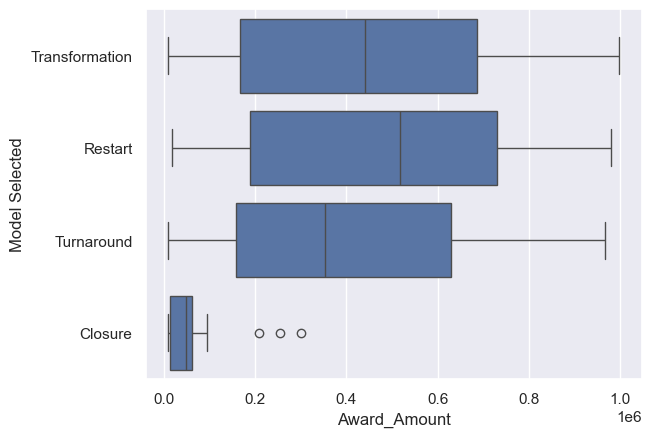

In [24]:
# clear previous figure resize
plt.clf()

# box plot award amount vs model selected
sns.boxplot(data=df, x="Award_Amount", y="Model Selected")
plt.show()


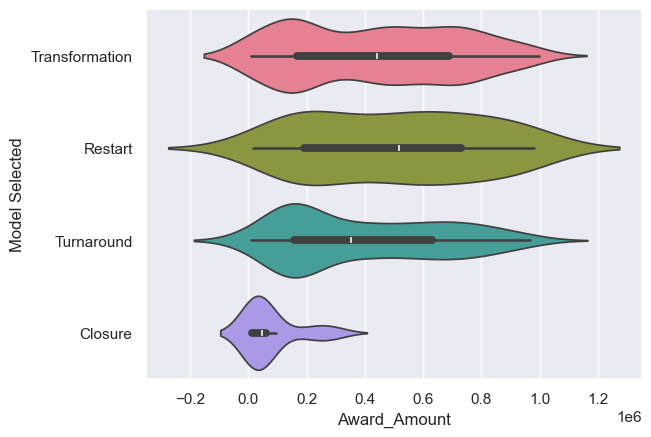

In [25]:
# violin plot award amount vs model selected with "husl" palette
# set hue to the y value and legend to False to avoid warnings
sns.violinplot(
    data=df,
    x="Award_Amount",
    y="Model Selected",
    palette="husl",
    hue="Model Selected",
    legend=False,
)
plt.show()


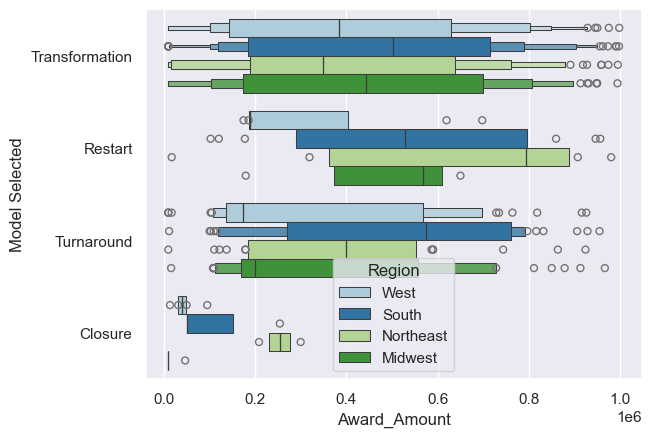

In [26]:
# boxen plot award amount vs model selected colored by region with "Paired" palette
sns.boxenplot(data=df, x="Award_Amount", y="Model Selected", hue="Region", palette="Paired")
plt.show()


### Catetorical Estimate Plots

The `pointplot()`, `barplot()`, and `countplot()` axes-level functions are used to plot _categorical estimate plots_.

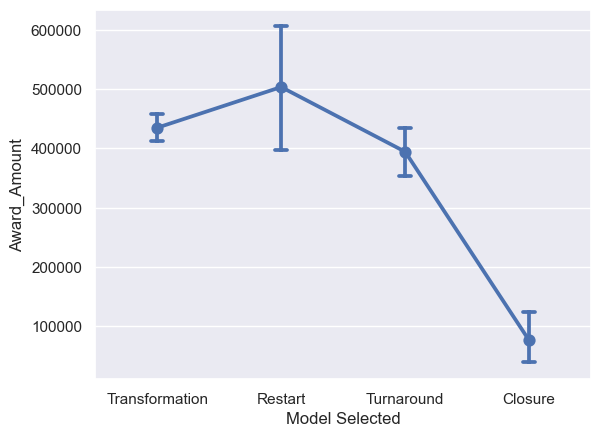

In [27]:
# point plot model selected vs award amount with caps
sns.pointplot(data=df, x="Model Selected", y="Award_Amount", capsize=0.1)
plt.show()


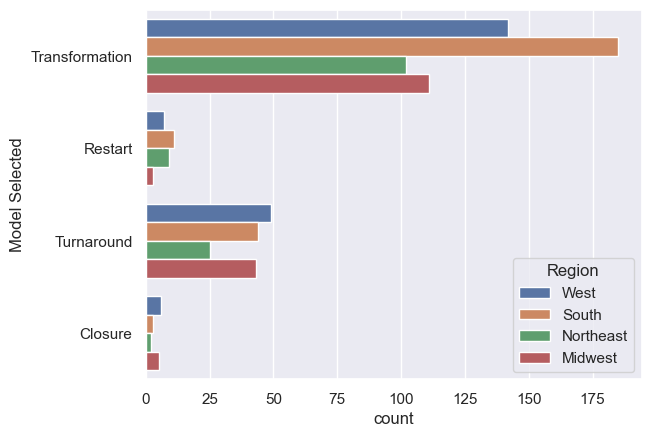

In [28]:
# count plot model selected on y-axis colored by region
sns.countplot(data=df, y="Model Selected", hue="Region")
plt.show()


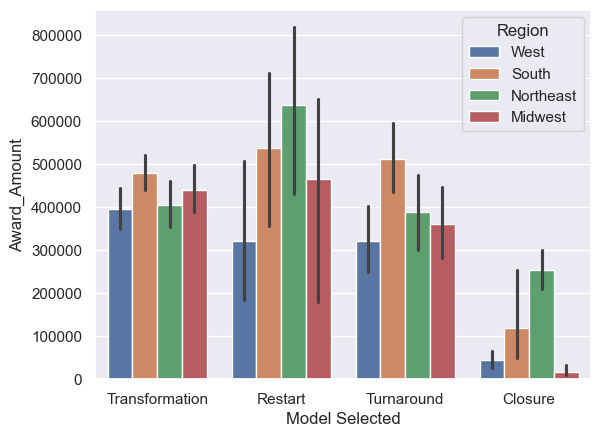

In [29]:
# bar plot colored by region
sns.barplot(data=df, x="Model Selected", y="Award_Amount", hue="Region")
plt.show()


### Heatmaps

A _heatmap_ is the most common type of _matrix plot_ that is used to plot the pairwise correlations between features in a dataset.

In [30]:
df = daily_show_guests.copy()


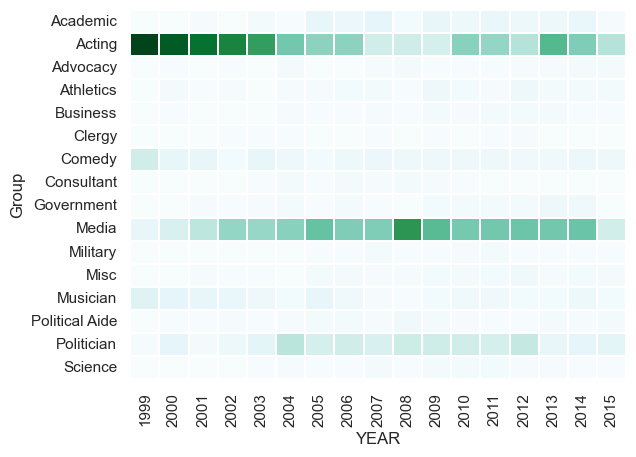

In [31]:
# build a Pandas crosstab by Group and Year
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])

# plot a heatmap matrix and rotate ticks
# remove the color bar and use the BuGn palette with thin lines
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


## Data-Aware Grids

### FacetGrid

Seaborn's `FacetGrid` is the foundation for building _data-aware grids_, which allow you to create a series of small plots that can be useful for understanding complex data relationships.

In [32]:
df = college_scorecard.copy()


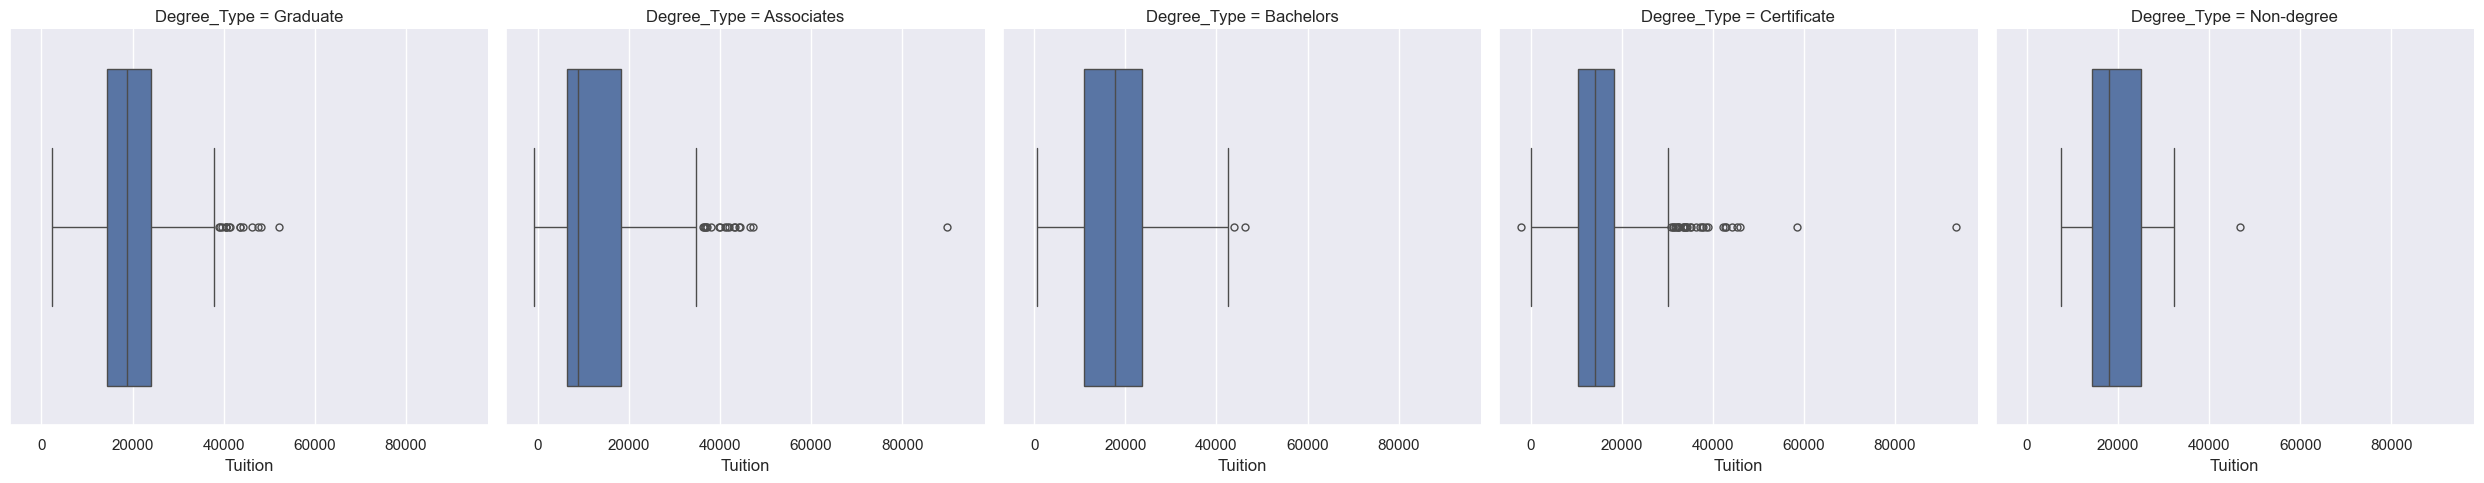

In [33]:
# create a factor plot of box plots of tuition values
sns.catplot(data=df, x="Tuition", kind="box", col="Degree_Type")
plt.show()


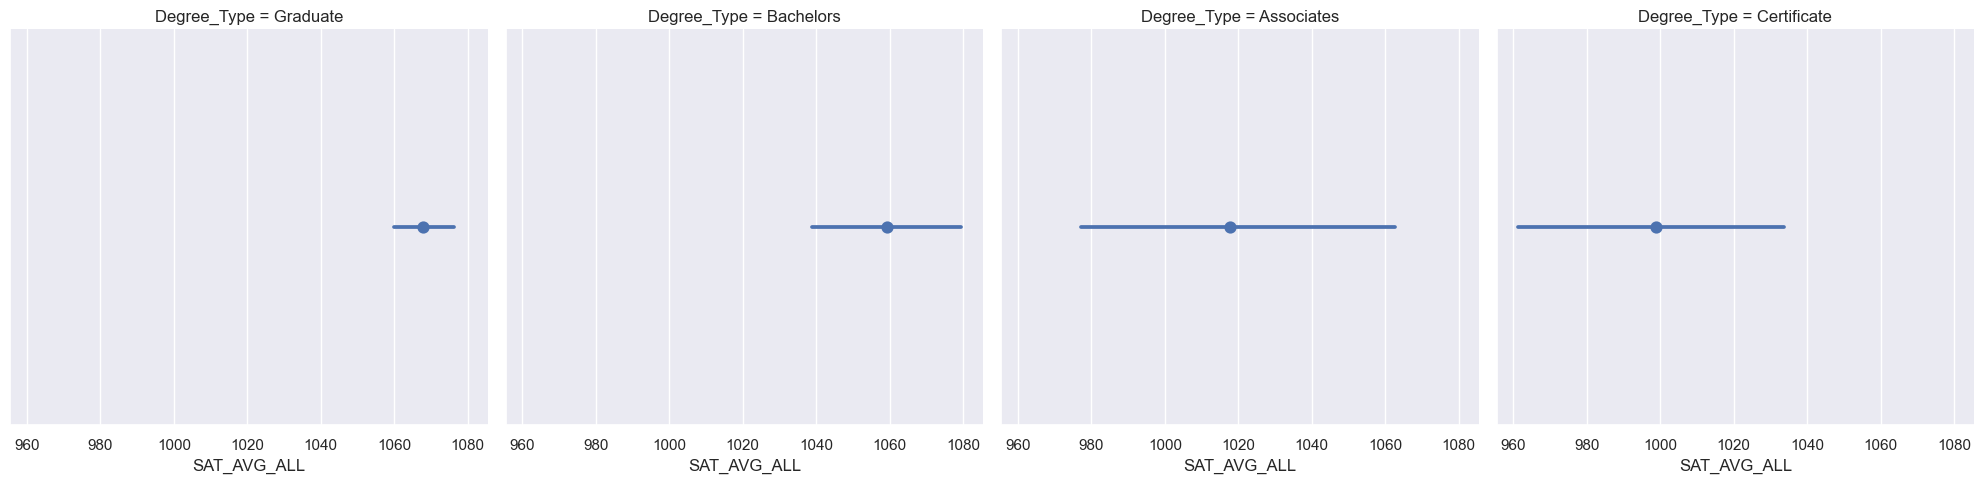

In [34]:
# create a facetted point plot of average SAT vs degree
sns.catplot(
    data=df,
    x="SAT_AVG_ALL",
    kind="point",
    col="Degree_Type",
    col_order=["Graduate", "Bachelors", "Associates", "Certificate"],
)
plt.show()


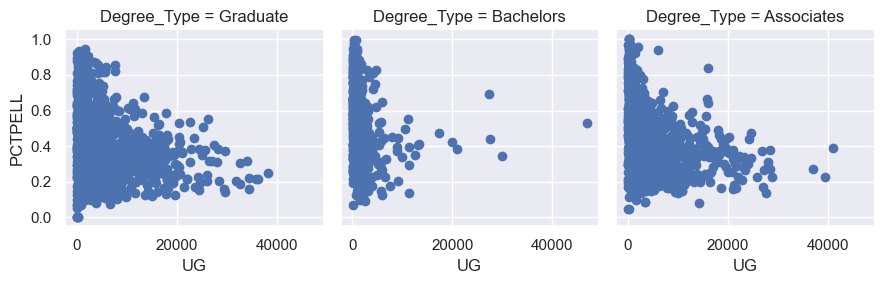

In [35]:
g = sns.FacetGrid(df, col="Degree_Type", col_order=["Graduate", "Bachelors", "Associates"])

# map a scatter plot of undergrad population vs Pell grant rate
g.map(plt.scatter, "UG", "PCTPELL")
plt.show()


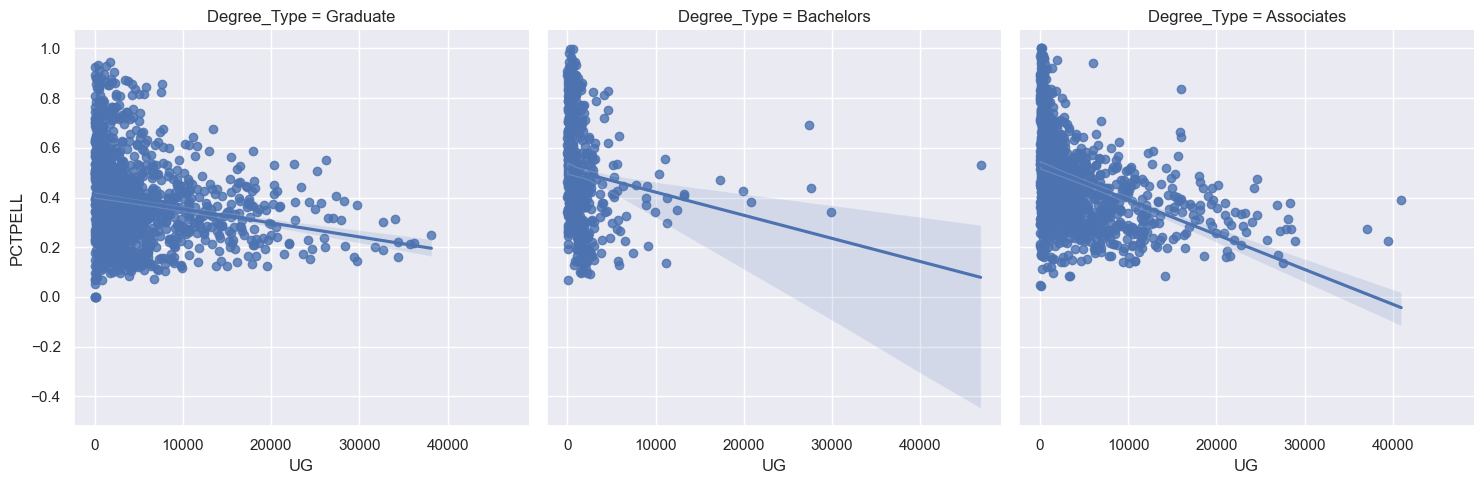

In [36]:
# linear regression plot
sns.lmplot(
    data=df,
    x="UG",
    y="PCTPELL",
    col="Degree_Type",
    col_order=["Graduate", "Bachelors", "Associates"],
)
plt.show()


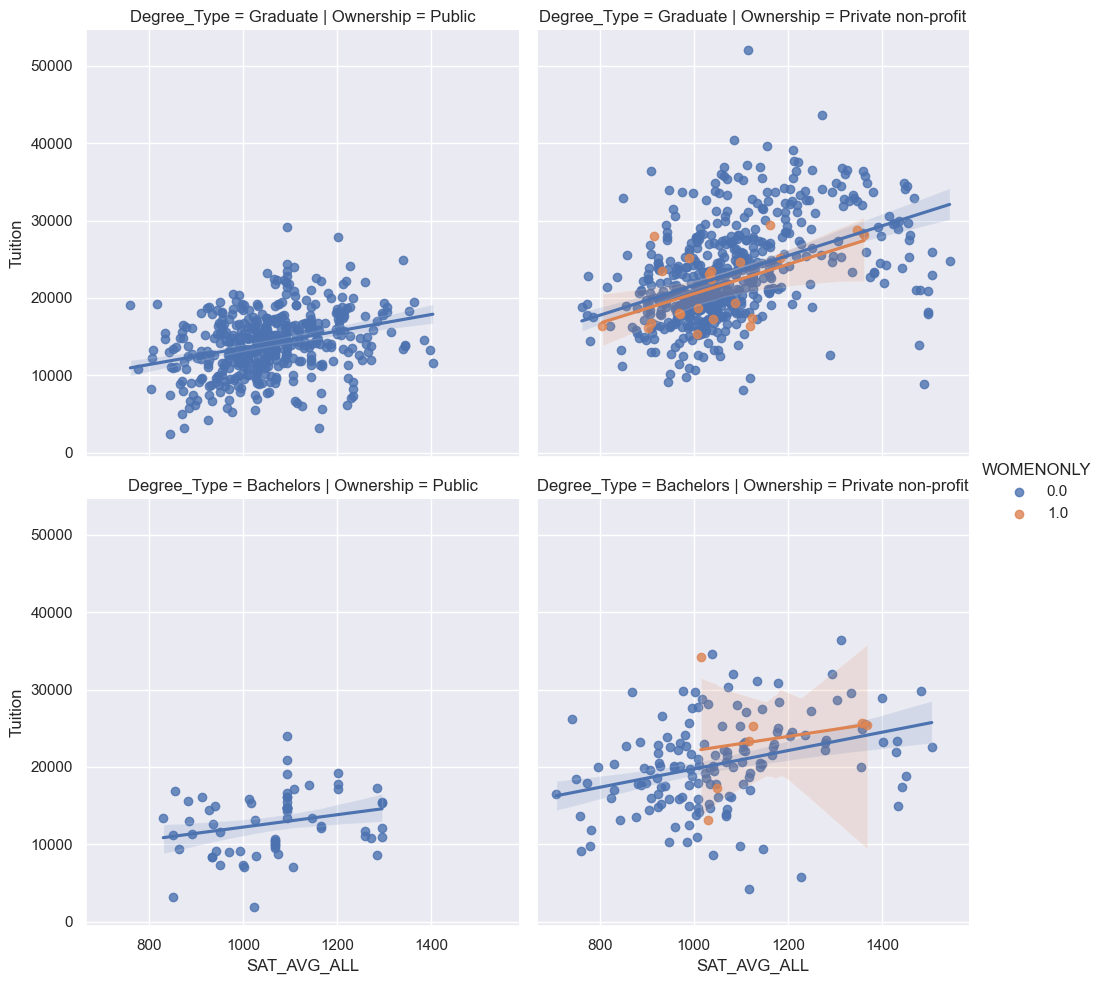

In [37]:
# linear regression plot average SAT vs tuition
# facet by degree type and public/private school ownership
# hue by `WOMENONLY`
sns.lmplot(
    data=df,
    x="SAT_AVG_ALL",
    y="Tuition",
    col="Ownership",
    row="Degree_Type",
    row_order=["Graduate", "Bachelors"],
    hue="WOMENONLY",
    col_order=["Public", "Private non-profit"],
)

plt.show()


### PairGrid

When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. Seaborn supports pair-wise analysis using `PairGrid`.

In [38]:
df = worst_drivers.copy()


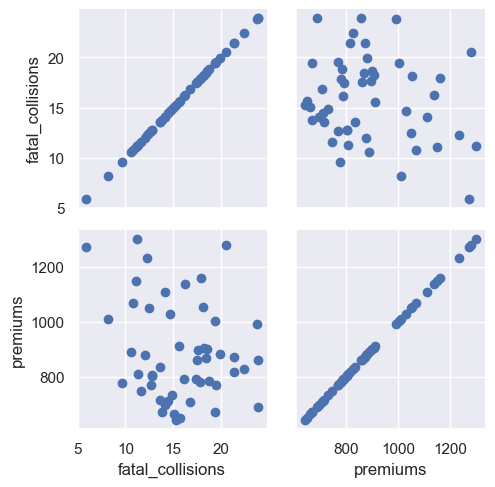

In [39]:
# compare fatal collisions to premiums using a scatter plot in a PairGrid
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)
plt.show()


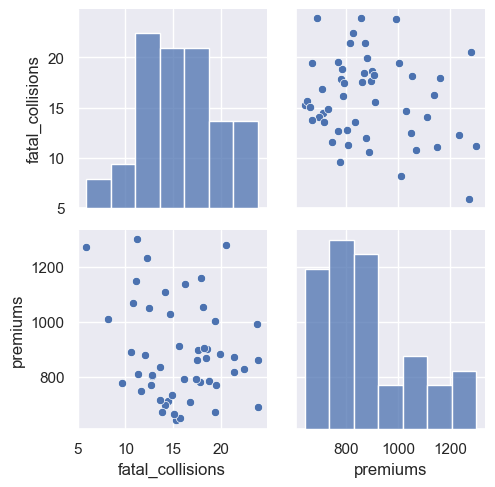

In [40]:
# same but with a histogram
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)
plt.show()


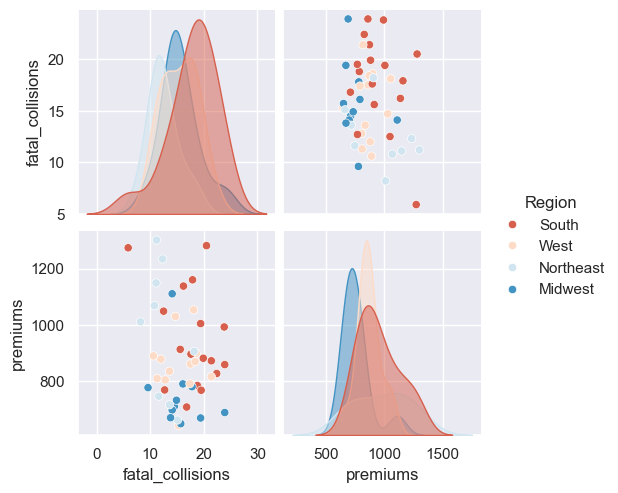

In [41]:
# pair-wise scatter plot
sns.pairplot(
    data=df,
    vars=["fatal_collisions", "premiums"],
    kind="scatter",
    hue="Region",
    palette="RdBu",
    diag_kws={"alpha": 0.5},
)
plt.show()


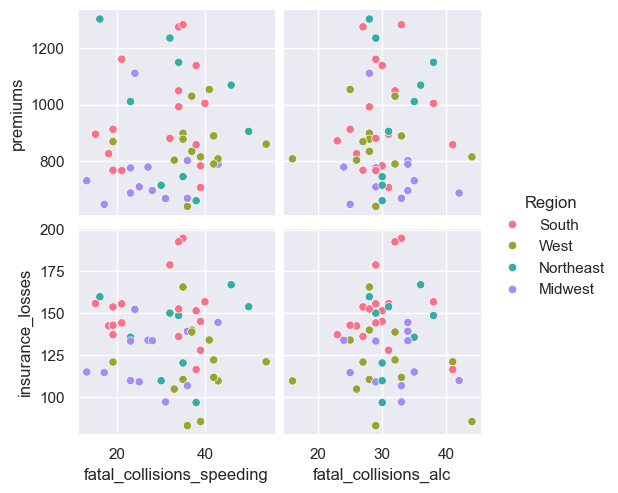

In [42]:
# fatal collisions from speeding to alcohol on the x-axis
# premiums to insurance losses on the y-axis
# hue by region using "husl"
sns.pairplot(
    data=df,
    x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
    y_vars=["premiums", "insurance_losses"],
    hue="Region",
    palette="husl",
    kind="scatter",
)
plt.show()


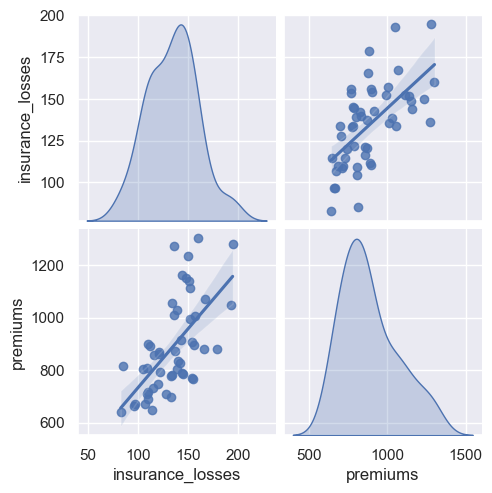

In [43]:
# pair-wise insurance losses to premiums with KDE plots along diagonals
sns.pairplot(data=df, vars=["insurance_losses", "premiums"], diag_kind="kde", kind="reg")
plt.show()


### JointGrid

Seaborn's `JointGrid` is the foundation for building _joint plots_.

In [44]:
df = bike_share.copy()


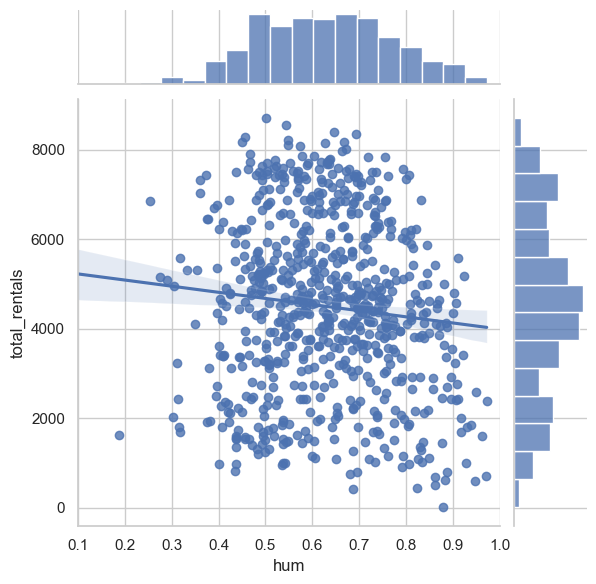

In [45]:
# compare humidity to total rentals
sns.set_style("whitegrid")
g = sns.JointGrid(data=df, x="hum", y="total_rentals", xlim=(0.1, 1.0))
g.plot(sns.regplot, sns.histplot)
plt.show()


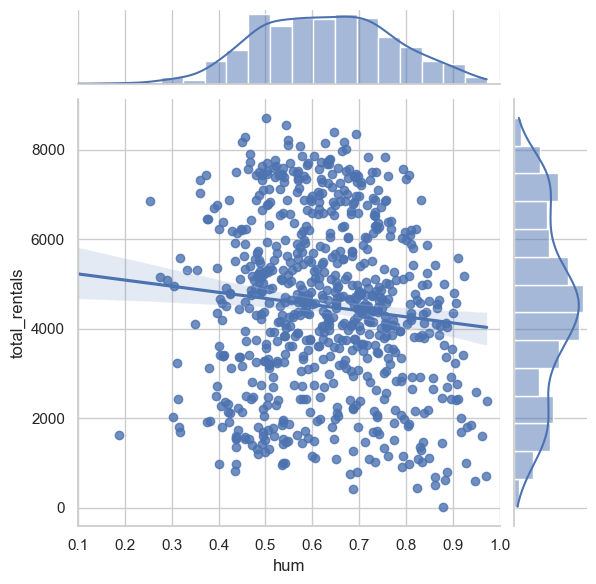

In [46]:
# same but with `jointplot`
sns.jointplot(data=df, x="hum", y="total_rentals", kind="reg", xlim=(0.1, 1.0))
plt.show()


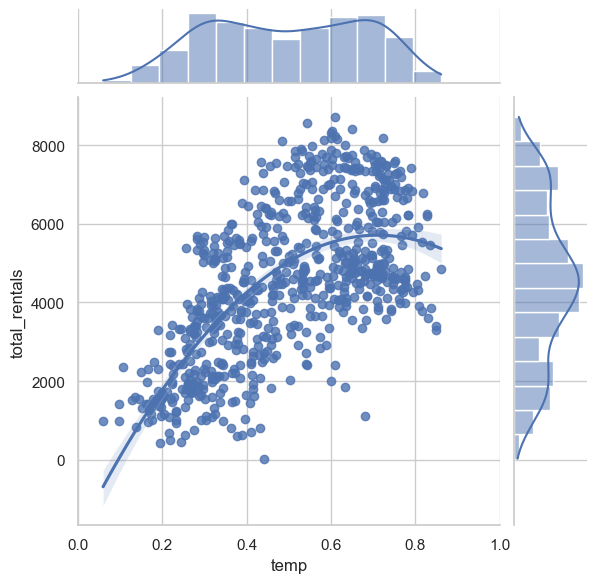

In [47]:
# compare temperature to total rentals
# add a 2nd order polynomial regression line
sns.jointplot(data=df, x="temp", y="total_rentals", kind="reg", order=2, xlim=(0, 1.0))
plt.show()


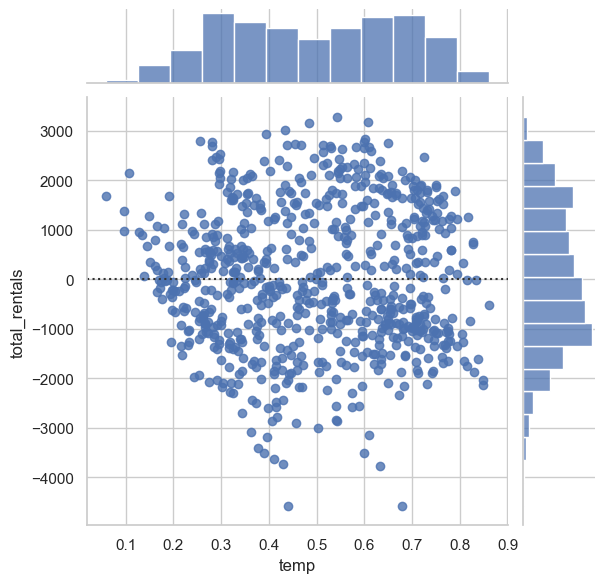

In [48]:
# use a residual plot to check the appropriateness of the model
sns.jointplot(data=df, x="temp", y="total_rentals", kind="resid", order=2)
plt.show()


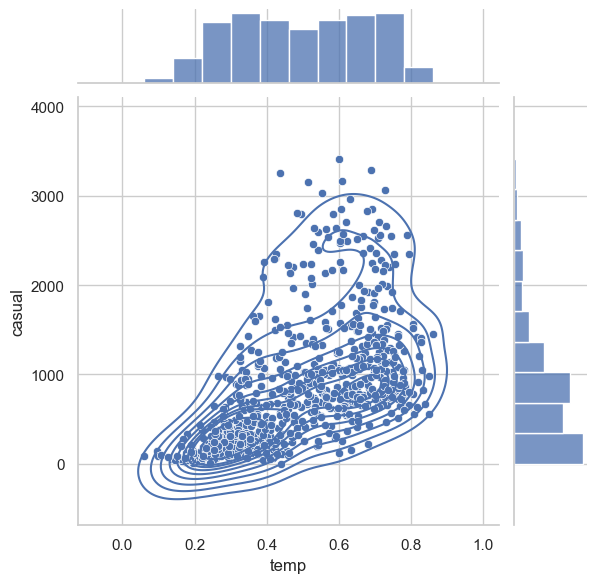

In [49]:
# compare temperature to casuals
# `marginal_kws` is used to pass arguments to the marginal plots (histograms with 10 bins each)
g = sns.jointplot(data=df, x="temp", y="casual", kind="scatter", marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)
plt.show()


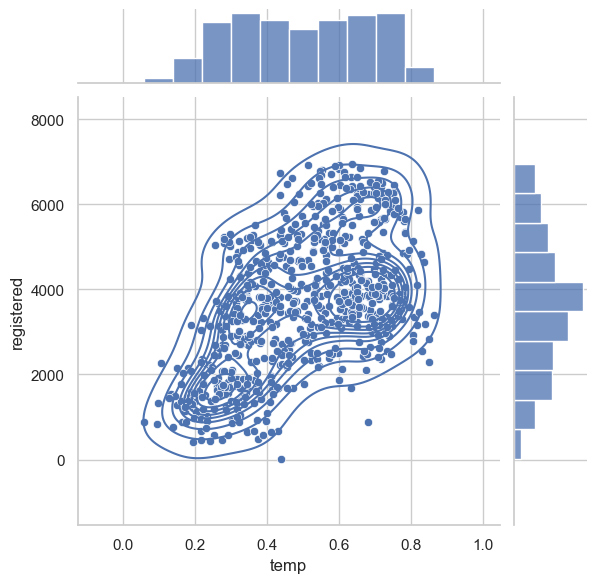

In [50]:
# same but only for registered riders
g = sns.jointplot(data=df, x="temp", y="registered", kind="scatter", marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)
plt.show()
